In [112]:
import json
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

In [113]:
with open("E:\EVA4_Git\S12\json\coco_try_out_norm.json", 'r') as fp:
    coco_json = json.load(fp)

In [114]:
all_heights = []
all_widths = []

In [115]:
#"bbox": [x,y,width,height]
for ann in coco_json.get('annotations'):
    all_heights.append(ann.get('bbox')[-1])
    all_widths.append(ann.get('bbox')[-2])

In [116]:
len(all_heights), len(all_widths)

(64, 64)

#### Plot H vs W

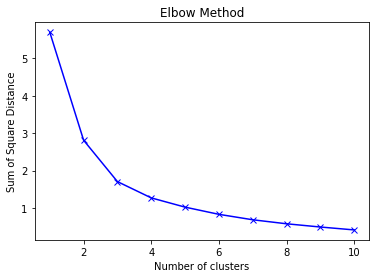

In [119]:
def plot_elbow_graph(width, height):
    x = width
    y = height
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit([_ for _ in zip(x,y)])
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss, 'bx-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Square Distance')
    plt.show()
plot_elbow_graph(all_widths, all_heights)

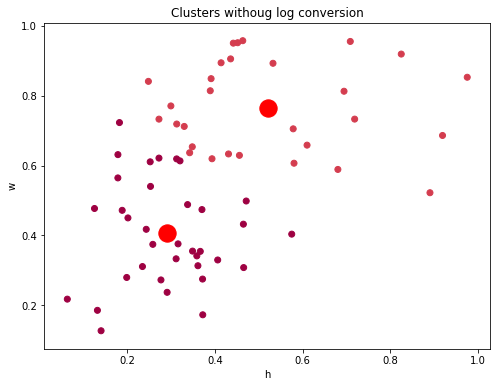

In [118]:
def plot_centroids(width, height, num_clusters, plot_log = False):
    x = np.log(width) if plot_log else width
    y = np.log(height) if plot_log else height
    x_label = "log(w)" if plot_log else "h"
    y_label = "log(h)" if plot_log else "w"
    title = "Clusters with log conversion" if plot_log else "Clusters withoug log conversion"
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict([_ for _ in zip(x,y)])
    plt.figure(figsize=[8,6])
    plt.scatter(x, y, c=[matplotlib.cm.get_cmap("Spectral")(float(i)/10) for i in kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
plot_centroids(all_widths, all_heights, 2, plot_log = False)